In [ ]:
## 제6장. 머신러닝
## 제8절. 앙상블
# # 2.붓스트랩
# 붓스트랩은 랜점 샘플링의 일종으로 가설 검증을 하거나 통계 계산을 하기 전에 단순임의복원추출법(중봅허용)을 적용하여 여러개의 동일한 크기의 표본 자료를 획득하는 방법.
# 주어진 데이터를 원해의 모집단을 대표하는 독립표본으로 가정하고 그 자료로부터 중복을 허용한 무작위 재추출을 하여 복수의 자료를 획득하고 각각에서 통계량을 계산한다.

# # 3.배깅
# 주어진 자료를 모집단으로 간주하여 주저진 자료에서 여러개의 붓스트랩 자료를 생성하고 각각의 붓스트랩 자료에 예측 모형을 만든후, 결합하여 최종 예측모형을 만드는 방식
# 통계분류와 회귀분석에서 사용하는 머신러닝 알고리즘의 안정성과 정확도를 향상시키기 위해 고안된 일종의 앙상블 학습법의 알고리즘이다.
# 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합을 방지한다.
# 배깅을 이용함 머신러닝은 붓스트래핑 > 모델링 > 보팅 순서로 진행된다.

In [ ]:
### 1. 배깅
# (1) scikit-learn의 ensemble.BaggingClassifier

In [47]:
# pip install seaborn
# !pip install scikit-learn
# !pip install scipy
# !pip install scikit-metrics

In [1]:
import pandas as pd
breast = pd.read_csv('C:/Users/A202112006/Desktop/py/data/breast-cancer.csv')

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

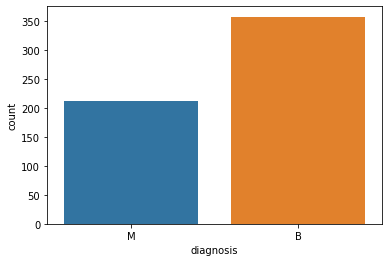

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='diagnosis', data =breast)

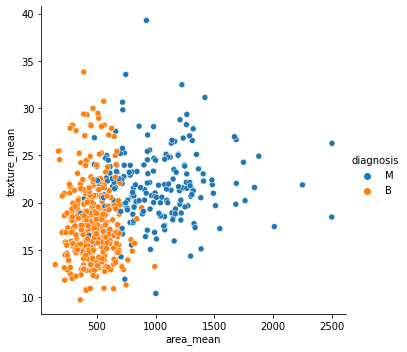

In [3]:
 sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0)
features = ["area_mean", "area_worst"]
X = breast[features]
y = breast["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state = 2023)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator =DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", clf.score(x_test, pred))

Accuracy Score :  1.0


c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [6]:
from sklearn.metrics import confusion_matrix 
pd.DataFrame(confusion_matrix(y_test, pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],105,2
True[1],8,56


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(x_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[105   2]
 [  8  56]]


정확도	94.15%
정밀도	96.55%
재현율	87.5%


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Program Files\Python38\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
plot_roc_curve(clf, x_test, y_test)
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Program Files\Python38\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
R_A_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print('ROC_AUC_score : ', R_A_score)

NameError: name 'roc_auc_score' is not defined

In [9]:
clf_oob=BaggingClassifier(base_estimator =DecisionTreeClassifier(),
                         oob_score=True)
oob=clf_oob.fit(X, y).oob_score_
print(oob)

0.9086115992970123


c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_bagging.py:797: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(2) scikit-learn의 ensemble.BaggingRegressor
* 코드 실습

In [10]:
import pandas as pd
car = pd.read_csv('C:/Users/A202112006/Desktop/py/data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
print(X.shape, y.shape)

(205, 13) (205,)


In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(base_estimator = DecisionTreeRegressor(), oob_score=True)
reg=reg.fit(X, y)
reg.oob_score_

c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_bagging.py:1255: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.8774667008229088

In [ ]:
### 2. 부스팅
# 부스팅은 예측력이 약한 모형들을 결합해 강한 예측모형을 만드는 방법
# 붓스트랩을 병렬로 수행하여 각 모델을 독립적으로 구축하는 배깅과 달리, 부스팅은 순차방식으로 학습을 진행
# 훈련 단계에서 알고리즘은 각 모델에 가중치를 할당하므로 분류결과가 좋은 데이터는 높은 가중치를,
# 분류결과가 좋지 않은 데이터는 낮은 가중치를 할당받아 다음 붓스트래핑에서 추출될 확률이 높아진다.
# 따라서 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있다.
# 다만, train 데이터에 과적합할 위험이 있다.

# (1) scikit-learn의 ensemble.AdaBoostClassifier

In [16]:
import pandas as pd
breast = pd.read_csv("C:/Users/A202112006/Desktop/py/data/breast-cancer.csv")

import numpy as np
from sklearn.model_selection import train_test_split
breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0)
features = ["area_mean", "texture_mean"]
X = breast[features]
y = breast["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state =1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [26]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.9122807017543859


In [25]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
pred=clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.8771929824561403


c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(x_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, x_test, y_test)
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Program Files\Python38\lib\site-packages\sklearn\metrics\__init__.py)

In [29]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


<BarContainer object of 2 artists>

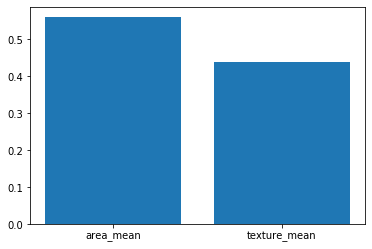

In [17]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)

In [ ]:
# (2) scikit-learn의 ensemble.AdaBoostRegressor
# 부스트 방식으로 회귀분석을 구현하는 AdaBoostRegressor 함수에 대해 알아보자.

In [31]:
car = pd.read_csv("C:/Users/A202112006/Desktop/py/data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [44]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor()
pred=reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	6107427.165
MAE	1893.647
RMSE	2471.321
ACC	89.883%


In [45]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.016325
1          carheight     0.004755
2          carlength     0.008188
3           carwidth     0.071156
4            citympg     0.004887
5   compressionratio     0.003855
6         curbweight     0.066917
7         enginesize     0.652675
8         highwaympg     0.058691
9         horsepower     0.062962
10           peakrpm     0.008209
11            stroke     0.013341
12         wheelbase     0.028040


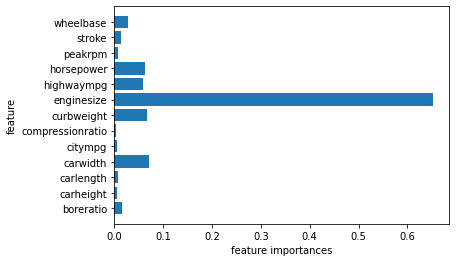

In [46]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align ='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

In [ ]:
### 3. 랜덤포레스트
# (1) scikit-learn의 ensemble.RandomForestClassifier
# 랜덤포레스트는 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형결합하여 최종 학습기를 만드는 방법이다.
# 수천개의 변수를 변수제거없이 모델링하므로 정확도 측면에서 좋은 성과를 보이는 기법 중 하나이다.
# 이론적인 설명이나 최종 겨로가에 대한 해석이 어렵다는 단점이 있지만, 예측력이 매우 높은것으로 알려져 있다.
# 입력변수가 많은 경우 배깅 및 부스팅과 비슷하거나 더 좋은 에측력을 보인다.

In [50]:
import pandas as pd
breast = pd.read_csv("C:/Users/A202112006/Desktop/py/data/breast-cancer.csv")

import numpy as np
from sklearn.model_selection import train_test_split
breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0)
features = ["area_mean", "texture_mean"]
X = breast[features]
y = breast["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state = 2023)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [51]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators =100, min_samples_split =5)
pred=clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.8947368421052632


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(x_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[96 11]
 [ 7 57]]


정확도	89.47%
정밀도	83.82%
재현율	89.06%


In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, x_test, y_test)
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Program Files\Python38\lib\site-packages\sklearn\metrics\__init__.py)

In [54]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean     0.715389
1  texture_mean     0.284611


<BarContainer object of 2 artists>

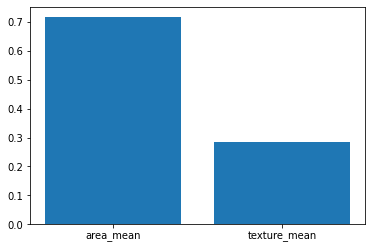

In [55]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)

(2) scikit-learn의 ensemble.RandomForestRegressor
* 코드 실습

In [28]:
car = pd.read_csv("../data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [29]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
pred=reg.fit(x_train, y_train).predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	4025945.154
MAE	1333.534
RMSE	2006.476
ACC	93.331%


In [30]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.004054
1          carheight     0.003733
2          carlength     0.007357
3           carwidth     0.025369
4            citympg     0.003837
5   compressionratio     0.004727
6         curbweight     0.191313
7         enginesize     0.660196
8         highwaympg     0.053589
9         horsepower     0.021506
10           peakrpm     0.008377
11            stroke     0.004461
12         wheelbase     0.011481


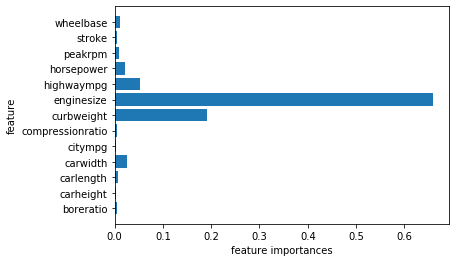

In [31]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align ='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()